#Creación data frame
Este script genera un conjunto de datos con 200 filas y las siguientes columnas:
- PatientID: un número entero aleatorio entre 1000 y 9999.
- ProviderID: un número entero aleatorio entre 100 y 999.
- DiagnosisCode: un código de diagnóstico aleatorio en el formato 'Dxxx', donde 'xxx' es un número entero aleatorio entre 1 y 999.
ProcedureCode: un código de procedimiento aleatorio en el formato 'Pxxx', donde 'xxx' es un número entero aleatorio entre 1 y 999.
- ServiceDate: una fecha de servicio aleatoria en 2020.
- BilledAmount: una cantidad facturada aleatoria entre 100.0 y 1000.0.
- PaidAmount: una cantidad pagada aleatoria entre 50.0 y 500.0.
- Fraud: una bandera de fraude aleatoria, donde 1 indica fraude y 0 indica no fraude. Se ha establecido una probabilidad del 5% de fraude y del 95% de no fraude.

In [214]:
import pandas as pd
import numpy as np
import random

# Generar datos aleatorios
np.random.seed(0)
random.seed(0)

patient_ids = np.random.randint(1000, 9999, size=2000)
provider_ids = np.random.randint(100, 999, size=2000)
diagnosis_codes = [f'D{str(i).zfill(3)}' for i in np.random.randint(1, 999, size=2000)]
procedure_codes = [f'P{str(i).zfill(3)}' for i in np.random.randint(1, 999, size=2000)]
service_dates = pd.date_range(start='2020-01-01', end='2020-12-31', periods=2000).date
billed_amounts = np.random.uniform(100.0, 1000.0, size=2000)
paid_amounts = np.random.uniform(50.0, 500.0, size=2000)

# Calcular la diferencia entre BilledAmount y PaidAmount
amount_difference = np.abs(billed_amounts - paid_amounts)

# Definir un umbral para determinar si una transacción es un fraude
# Aumentamos el umbral para reducir la cantidad de fraudes
fraud_threshold = 600

# Generar la columna de fraude basándose en la diferencia de la cantidad
fraud_flags = (amount_difference > fraud_threshold).astype(int)

# Crear el DataFrame
df = pd.DataFrame({
    'PatientID': patient_ids,
    'ProviderID': provider_ids,
    'DiagnosisCode': diagnosis_codes,
    'ProcedureCode': procedure_codes,
    'ServiceDate': service_dates,
    'BilledAmount': billed_amounts,
    'PaidAmount': paid_amounts,
    'Fraud': fraud_flags
})

# Guardar el DataFrame como un archivo CSV
df.to_csv('healthcare_fraud_dataset.csv', index=False)

#Importamos librerías necesarias

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

#Preprocesamiento de datos
Convertimos códigos de diagnóstico y procedimiento a valores numéricos
Convertimos fechas de servicio a valores numéricos

In [216]:
# Convertir los códigos de diagnóstico y procedimiento a valores numéricos
df['DiagnosisCode'] = df['DiagnosisCode'].apply(lambda x: int(x[1:]))
df['ProcedureCode'] = df['ProcedureCode'].apply(lambda x: int(x[1:]))

# Convertir las fechas de servicio a valores numéricos
df['ServiceDate'] = df['ServiceDate'].apply(lambda x: x.toordinal())

#División del conjunto de datos
Características (x) y objetivo (y).
Características: variables que se utilizan para predecir objetivo (fraud)


In [217]:
# Dividir el conjunto de datos en características (X) y objetivo (y)
X = df.drop('Fraud', axis=1)
y = df['Fraud']

Dividimos conjunto de entrenamiento y de prueba

In [218]:
# Dividir el conjunto de datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Creación y entrenamiento del modelo
Utilizando randomforestclassifier(de scikit-learn).
Se escoge porque tiene gran capacidad para manejar conjuntos de datos complejos y de alta dimensionalidad. También pueden manejar características irrelevantes o redundantes.

In [219]:
# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

#Creamos predicciones
Utilizando las características del conjunto de prueba. Esto devuelve un array de predicciones, una para cada fila en el conjunto de prueba

In [220]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Evaluación del modelo

In [221]:

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC Score:', roc_auc)

Accuracy: 0.98
Precision: 0.9811320754716981
Recall: 0.8813559322033898
F1 Score: 0.9285714285714285
ROC AUC Score: 0.9392116904418708


#Matriz de confusión
- La primera fila representa las instancias que pertenecen a la clase negativa (no fraude). En este caso, hay 37 instancias que se clasificaron correctamente como no fraude (verdaderos negativos) y 0 instancias que se clasificaron incorrectamente como fraude (falsos positivos).
- La segunda fila representa las instancias que pertenecen a la clase positiva (fraude). En este caso, hay 3 instancias que se clasificaron incorrectamente como no fraude (falsos negativos) y 0 instancias que se clasificaron correctamente como fraude (verdaderos positivos).

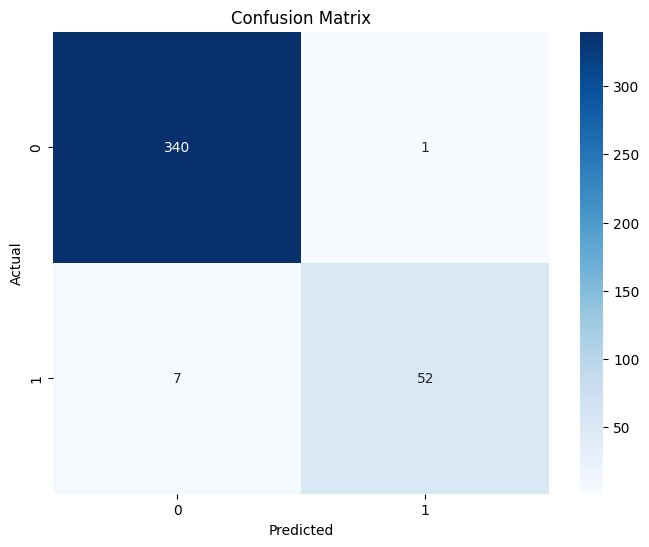

In [222]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Gráfico de barras
conteo - fraude

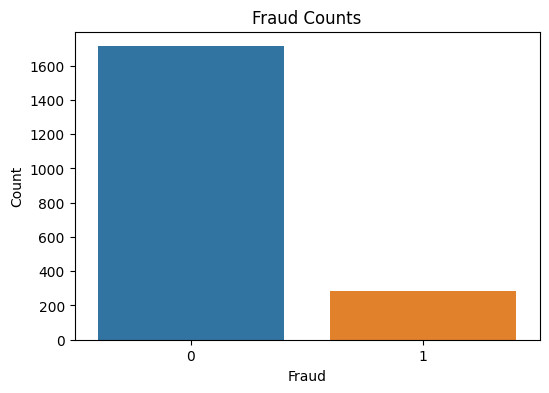

In [223]:
# Crear un gráfico de barras para visualizar los datos
fraud_counts = df['Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Fraud Counts')
plt.show()

#Histogramas


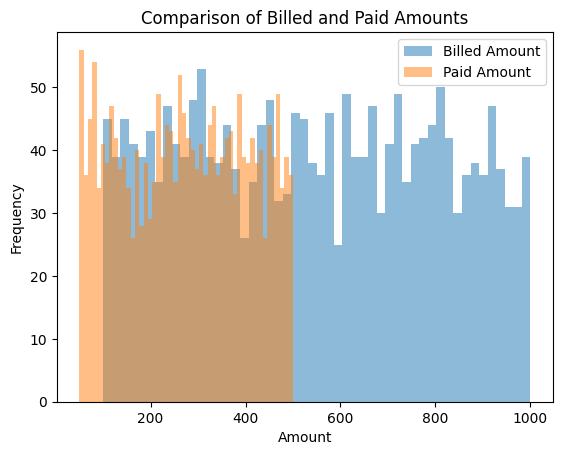

In [224]:
# Crear un histograma que compare los montos facturados y pagados
plt.hist(df['BilledAmount'], bins=50, alpha=0.5, label='Billed Amount')
plt.hist(df['PaidAmount'], bins=50, alpha=0.5, label='Paid Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Billed and Paid Amounts')
plt.legend(loc='upper right')
plt.show()